In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import mpmath as mp
import pickle
from scipy.stats import binom
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py

In [3]:
down_path = '../data_tables/poly_bsc/down/n'
up_path = '../data_tables/poly_bsc/down/n'
extension = ".in"

In [4]:
N = 35
filepath = down_path + str(N) + extension
orig1 = load_table(filepath)

0.170000000004


//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


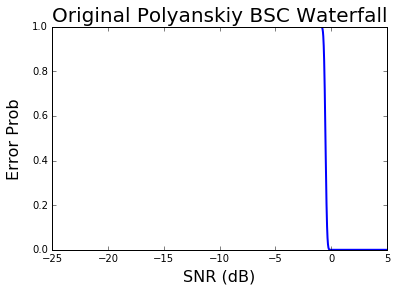

In [5]:
plot(orig1[0], orig1[1], lw=2.0)
xlabel('SNR (dB)', fontsize=16)
ylabel('Error Prob', fontsize=16, labelpad=10)
title('Original Polyanskiy BSC Waterfall', fontsize=20)
print orig1[0][np.where(orig1[1]<=10**(-9))][0]

In [23]:
blocklength = 4200 # 10000
L = 170
beta_ell = sum([nCr(blocklength, k) for k in range(L)])
print beta_ell
print 2**(-blocklength)*beta_ell

1696048944875816525896994298885448034747120757330866746032415112658873872652806169976023224416668386258970476734242775272533102794170705740645941944273877258013677233423693587204524703554379995377373667834113565496918996414828877021627665802760269441191243062031153947021149349959045544960709544109719604480
0.0


In [38]:
blocklength = 10000
SNR = -20
d = Q(np.sqrt(2*10**(SNR/10)))
# L = 2100
# alpha_ell = sum([nCr(blocklength, k) * (1-d)**(blocklength - k) * d**k for k in range(L)])
# print alpha_ell
# print d

In [39]:
rv = binom(blocklength, d)

In [46]:
rv.cdf(4000)

5.0340127322249823e-19

In [51]:
z = sum([nCr(blocklength, k) for k in range(3900, 4000)])

OverflowError: long int too large to convert to float

In [4]:
def beta_ell_df(n, k):
    numer = sum(np.log2(np.arange(1, n+1)))
    denom = sum(np.log2(np.arange(1, k+1))) + sum(np.log2(np.arange(1, n-k+1)))
    return 2**(numer - denom -n)

def beta_ell_calc(n, beta_ell_last, L):
#     beta_ell_last = 2**beta_ell_last
    return beta_ell_last + beta_ell_df(n, L)
#     return sum([beta_ell_df(n, k) for k in range(L+1)])

In [80]:
%time
beta_ell_df(4200, 2100)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


0.012310893248339535

In [82]:
%%time
beta_ell(4200, 2000)

CPU times: user 16.9 s, sys: 36.4 ms, total: 16.9 s
Wall time: 16.9 s


0.00096099831485615202

In [83]:
%%time
beta_ell(4200, 3000)

CPU times: user 25.4 s, sys: 68.9 ms, total: 25.4 s
Wall time: 25.4 s


0.9999999999974265

In [84]:
%%time
beta_ell(4200, 4000)

CPU times: user 33.8 s, sys: 71.4 ms, total: 33.8 s
Wall time: 33.9 s


0.99999999999742661

In [5]:
z = beta_ell_df(4200, 1999)
beta_ell_calc(4200, z, 2000)

//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


0.00020075382476230727

In [17]:
%%time
for N in range(1, 10):
    rate = 160*N/10000
    payload = 160*N
    beta = mp.power(2, -payload)
    print N, rate, L[np.where(beta_res >= beta)][0]
    print N, rate, L[np.where(beta_res <= beta)][-1]

1 0.016 4269
1 0.016 4268
2 0.032 3960
2 0.032 3959
3 0.048 3725
3 0.048 3724
4 0.064 3529
4 0.064 3528
5 0.08 3357
5 0.08 3356
6 0.096 3202
6 0.096 3201
7 0.112 3100
7 0.112 3099
8 0.128 3100
8 0.128 3099
9 0.144 3100
9 0.144 3099
CPU times: user 822 ms, sys: 42.3 ms, total: 865 ms
Wall time: 835 ms


In [8]:
%%time
blocklength = 10000
L = arange(1, 100, 1)
beta_res = zeros(len(L))
beta_ell_last = beta_ell_df(blocklength, 0)
for l in L:
    beta_ell_last = beta_ell_calc(blocklength, beta_ell_last, l)
    beta_res[l-1] = beta_ell_last
    if l % 10 == 0:
        print l, beta_ell_last
beta_ell_func = sp.interpolate.interp1d(beta_res, L) #, bounds_error = False) #, fill_value = (1, blocklength))

AttributeError: 'int' object has no attribute 'log2'

In [205]:
%%time
blocklength = 10000
SNR = arange(-20, 5, 0.01)
d_range = Q(np.sqrt(2*10**(SNR/10)))
alpha_ells = []
for d in d_range:
    alpha_ells.append((d, binom(blocklength, d)))
# rv = binom(blocklength, d)

CPU times: user 1.47 s, sys: 39.5 ms, total: 1.51 s
Wall time: 1.5 s


-19.9315685693
0.0


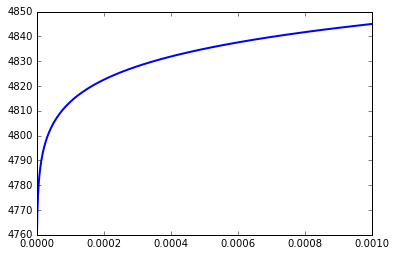

In [236]:
x = arange(10**(-6), 10**(-3), 10**(-6))
print log2(10**(-6))
plot(x, beta_ell_func(x), lw=2.0)
print beta_ell_calc(10000, beta_ell_df(10000, 0), 1)
# print log2(beta_ell_calc(10000, beta_ell_df(10000, 0), 1))

In [216]:
%%time
N = 30
blocklength = 10000
rate = 160*N/blocklength
print rate
beta = 0.5**(160*N)
print beta
# print log2(beta)
lambda_ell = beta_ell_func(beta)
print lambda_ell
ell = int(lambda_ell)
lambda_ = lambda_ell - ell
res = zeros(len(alpha_ells))
for idx in range(len(alpha_ells)):
    d, rv = alpha_ells[idx][0], alpha_ells[idx][1]
    res[idx] = (1-lambda_)*rv.cdf(ell) + lambda_*rv.cdf(ell+1)

0.48
0.0
-inf
nan


/anaconda/envs/conda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log2


ValueError: cannot convert float NaN to integer

ValueError: x and y must have same first dimension

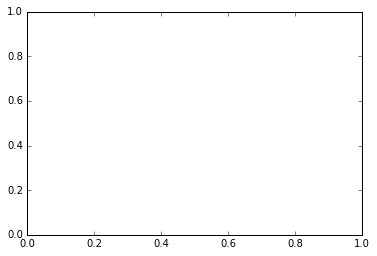

In [207]:
plot(SNR, 1-res, lw=2.0)
print SNR[np.where((1-res)<=10**(-9))][0]
print SNR[45]
print SNR[59]

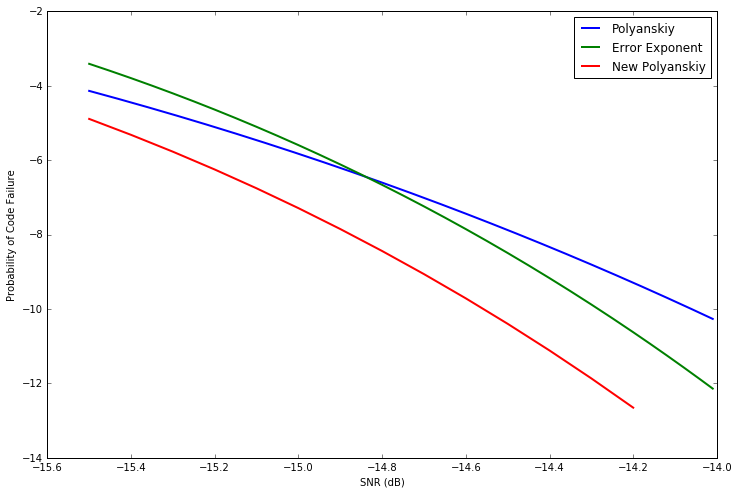

In [186]:
N = 1
polyfile = '../data_tables/poly_bsc/up/n' + str(N) + '.in'
expfile = '../data_tables/error_exp/up/n' + str(N) + '.in'
figure(figsize=(12, 8))
polytable = load_table(polyfile)
exptable = load_table(expfile)
plot(polytable[0][950:1100], log10(polytable[1][950:1100]), lw=2.0, label="Polyanskiy")
plot(exptable[0][50:200], log10(exptable[1][50:200]), lw=2.0, label="Error Exponent")
plot(SNR[45:59], log10(1-res[45:59]), lw=2.0, label='New Polyanskiy')
xlabel('SNR (dB)')
ylabel('Probability of Code Failure')
legend(loc=0)

# Polyanskiy BSC Converse Try Two

In [27]:
down_path = '../data_tables/poly_bsc_converse/down/n'
up_path = '../data_tables/poly_bsc_converse/up/n'
extension = ".in"

In [28]:
def beta_ell_df(n, k):
    numer = sum(np.log2(np.arange(1, n+1)))
    denom = sum(np.log2(np.arange(1, k+1))) + sum(np.log2(np.arange(1, n-k+1)))
    return mp.power(2, numer-denom-n)

def beta_ell_calc(n, beta_ell_last, L):
    return beta_ell_last + beta_ell_df(n, L)

In [29]:
%%time
def beta_ell_gen(blocklength):
    L = arange(1, blocklength, 1)
    beta_ells = np.zeros(len(L), dtype='object')
    beta_ell_last = beta_ell_df(blocklength, 0)
    for l in L:
        beta_ell_last = beta_ell_calc(blocklength, beta_ell_last, l)
        beta_ells[l-1] = beta_ell_last
    return beta_ells
#         if l % 1000 == 0:
#             print l, beta_ell_last, beta_res[l-1]
# beta_ell_func = sp.interpolate.interp1d(beta_res, L) #, bounds_error = False) #, fill_value = (1, blocklength))

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 7.87 µs


In [30]:
%%time
def alpha_ell_gen(SNR, blocklength):
    d_range = Q(np.sqrt(2*10**(SNR/10)))
    alpha_ells = []
    for d in d_range:
        alpha_ells.append((d, binom(blocklength, d)))
    return alpha_ells

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs


In [31]:
def polyanskiy_converse_table(SNR, alpha_ells, beta_ells, rate, blocklength=10000):
    beta = mp.power(2, -rate*blocklength)
    ell = np.where(beta_ells < beta)[0][-1]
    lambda_ = (beta - beta_ells[ell]) / (beta_ells[ell+1] - beta_ells[ell])
    res = zeros(len(alpha_ells))
    for idx in range(len(alpha_ells)):
        d, rv = alpha_ells[idx][0], alpha_ells[idx][1]
        res[idx] = (1-lambda_)*rv.cdf(ell) + lambda_*rv.cdf(ell+1)
    return [SNR, 1-res]

In [32]:
N = 8
blocklength = 10000//N
rate = 160*N/10000
print "rate", rate
alpha_ells = alpha_ell_gen(SNR, blocklength)
beta_ells = beta_ell_gen(blocklength)
table = polyanskiy_converse_table(SNR, alpha_ells, beta_ells, rate, blocklength)

rate 0.128


In [12]:
%%time
N = 35
blocklength = 10000
rate = 160*N/blocklength

beta = mp.power(2, -rate*blocklength)
ell = np.where(beta_res < beta)[0][-1]
lambda_ = (beta - beta_res[ell]) / (beta_res[ell+1] - beta_res[ell])
# print beta, (1-lambda_)*beta_res[ell] + lambda_*beta_res[ell+1]
# print beta_res[ell], beta_res[ell+1]
res = zeros(len(alpha_ells))
for idx in range(len(alpha_ells)):
    d, rv = alpha_ells[idx][0], alpha_ells[idx][1]
    res[idx] = (1-lambda_)*rv.cdf(ell) + lambda_*rv.cdf(ell+1)

1.70617777991791e-1686 1.70617777991791e-1686
6.48974327876901e-1687 6.46075836371104e-1686
CPU times: user 494 ms, sys: 7.26 ms, total: 501 ms
Wall time: 499 ms


CPU times: user 4.2 s, sys: 55.2 ms, total: 4.26 s
Wall time: 4.26 s


//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


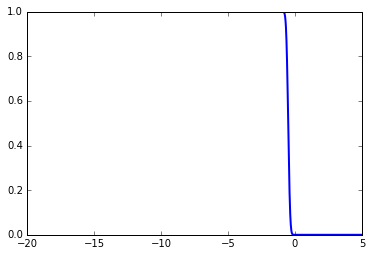

In [10]:
%%time
N = 35
rate = 160*N/10000
blocklength = 10000
SNR = arange(-20, 5, 0.01)
alpha_ells = alpha_ell_gen(SNR, blocklength)
beta_ells = beta_ell_gen(blocklength)
table = polyanskiy_converse_table(SNR, alpha_ells, beta_ells, rate, blocklength)
plot(table[0], table[1], lw=2.0)

In [24]:
%%time
for N in arange(1, 36, 1):
    filepath = down_path + str(N) + extension
    rate = 160*N/10000
    table = polyanskiy_converse_table(SNR, alpha_ells, beta_ells, rate, 10000)
    save_table(table, filepath)
# plot(z[0], z[1], lw=2.0)
# title('New Polyanskiy Waterfall', fontsize=20)

CPU times: user 18.5 s, sys: 144 ms, total: 18.7 s
Wall time: 18.7 s


In [33]:
%%time
SNR = arange(-20, 5, 0.01)
for N in arange(1, 36, 1):
    filepath = up_path + str(N) + extension
    blocklength = 10000//N
    rate = 160*N/10000
    alpha_ells = alpha_ell_gen(SNR, blocklength)
    beta_ells = beta_ell_gen(blocklength)
    table = polyanskiy_converse_table(SNR, alpha_ells, beta_ells, rate, blocklength)
    save_table(table, filepath)
# plot(z[0], z[1], lw=2.0)
# title('New Polyanskiy Waterfall', fontsize=20)

CPU times: user 1min 18s, sys: 527 ms, total: 1min 18s
Wall time: 1min 18s


In [18]:
print np.where(z[1] <= 10**(-9))[0][0]
print SNR[2016]

2016
0.160000000003


In [53]:
print beta_res_2[1]
print beta_res_2[2]
print beta_res_2[1] < beta_res_2[2]
print np.where(beta_res_2 < beta_res_2[5])
beta = mp.power(2, -160*10)
print beta
print np.where(beta_res_2 < beta)[0][-1]

2.50643704337337e-3003
8.35395499973635e-3000
True
(array([0, 1, 2, 3, 4]),)
2.24909053360871e-482
2693
